# BooksNN - Use statsmodels to make predictions
* AR, ARMA on stationary series
* SARIMA (seasonal autoregressive integrated moving average) - works on seasonal data with trend. 
* VAR (variable? autoregression) - multivariate data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyisbn #module for converting ISBN-13 to ISBN-10 and vice versa
import booksnn as bnn
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


In [39]:
startdate = '2016-01-01'
enddate = '2020-05-10'

(up,uc,sr) = bnn.load_preprocess_data(100,startdate,enddate)

# Should implement all these load options: 
# how many ASINs, or one specific ASIN (this should be handled by function called load_preprocess_series)
# start/end dates?
# univariate/multivariate
# standard data or first diff?
# with trend or de-trended?
# seasonal or de-seasoned?
# AND DON'T FORGET that you need to get back all params for inverse.


# Find common ASINs
asins = set.intersection(set.intersection(set(up.columns),set(uc.columns)),set(sr.columns))

Num entries discarded: 39
Num entries discarded: 22
Num entries discarded: 20


In [49]:
# Arbitrary single ASIN 
asin = up.columns[2] 

X_startdate = '2016-01-01'
X_enddate = '2018-12-31'
y_startdate = '2019-01-01'
y_enddate = '2019-12-31'

X = up[asin].truncate(X_startdate,X_enddate)
y = up[asin].truncate(y_startdate,y_enddate)

# first difference data
#X = up[asin].diff().dropna().truncate(X_startdate,X_enddate)
#y = up[asin].diff().dropna().truncate(y_startdate,y_enddate)

### The Original Data

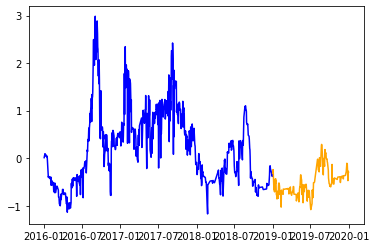

In [50]:
# reduce amt of data
#X = X.resample('M').mean()
#y = y.resample('M').mean()

plt.plot(X,color='blue')
plt.plot(y,color='orange')

###  SARIMAX

Note - originally tried ARIMA, but this has no seasonality consideration, so it's junk. 

The implementation is called SARIMAX instead of SARIMA because the “X” addition to the method name means that the implementation also supports exogenous variables. These are parallel time series variates that are not modeled directly via AR, I, or MA processes, but are made available as a weighted input to the model.

Note:
In an economic model, an *exogenous variable* is one whose value is determined outside the model and is imposed on the model, and an exogenous change is a change in an exogenous variable.

In contrast, an *endogenous variable* is a variable whose value is determined by the model. An endogenous change is a change in an endogenous variable in response to an exogenous change that is imposed upon the model.

https://www.kaggle.com/poiupoiu/how-to-use-sarimax
ARMA model:(p,q)
ARIMA model:(p,d,q)
SARIMA model:(p,d,q)(sp,sd,sq,s)
ARIMAX model:(p,d,q) + exog
SARIMAX model:(p,d,q)(sp,sd,sq,s) +exog

In [ ]:


model=sm.tsa.statespace.SARIMAX(endog=X,order=(1,1,1),seasonal_order=(1,1,1,365),trend='c',enforce_invertibility=False)
results=model.fit()
pred = model_fit.predict(start='2019-01',end='2019-12')

#print(results.summary())

fig = plt.figure(figsize=(16,5))
plt.plot(y,color='orange')
pred.plot()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


#### Try same thing on first difference data

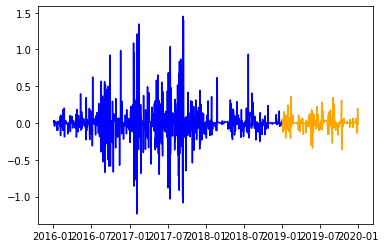

In [118]:
plt.plot(X.diff().dropna(),color='blue')
plt.plot(y.diff().dropna(),color='orange')

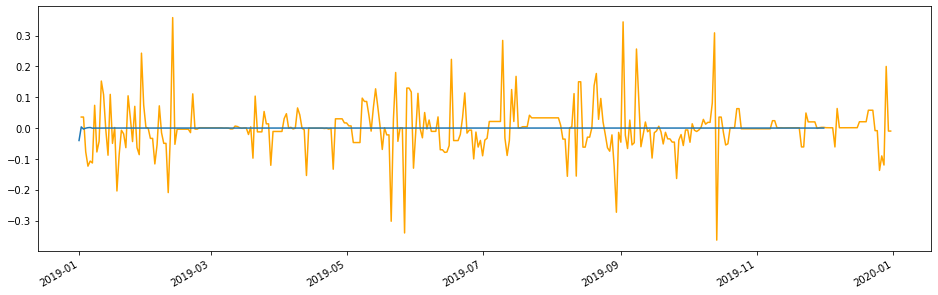

In [33]:
model = sm.tsa.arima_model.ARIMA(X.diff().dropna(),(5,1,1))
model_fit = model.fit()
pred = model_fit.predict(start='2019-01',end='2019-12')

#error = mean_squared_error(y,pred)
#print('MSE: '+ str(error))

fig = plt.figure(figsize=(16,5))
plt.plot(y.diff().dropna(),color='orange')
pred.plot()

### Try ARIMA again with monthly data
Conclusion - this is also junk. 

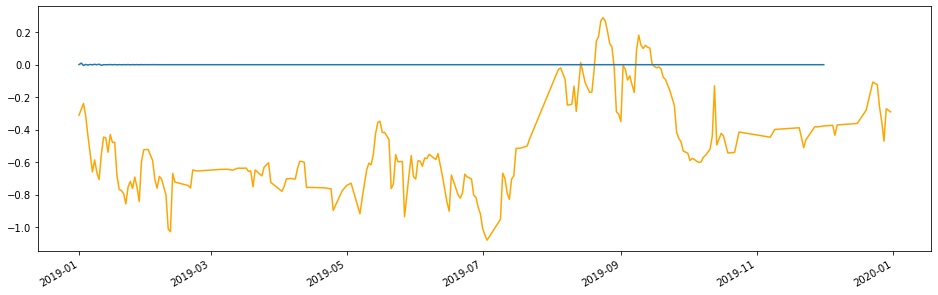

In [34]:
model = ARIMA(X.resample('D').mean(),(12,1,1))
model_fit = model.fit()
pred = model_fit.predict(start='2019-01',end='2019-12')

#error = mean_squared_error(y,pred)
#print('MSE: '+ str(error))

fig = plt.figure(figsize=(16,5))
plt.plot(y,color='orange')
pred.plot()


In [37]:
# Should also try VAR, but right now statsmodels is not going well AT ALL, so I'm going to move on. 

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/